<a href="https://colab.research.google.com/github/ashikshafi08/DUDL-Pytorch/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np 
import matplotlib.pyplot as plt


from IPython import display
display.set_matplotlib_formats('svg')


### Gradient Descent in 1D 

In [77]:
# Function 
def f(x):
  return 3*x**2 - 3*x + 4 

# Derivative function of the above 
def deriv(x):
  return 6*x - 3 

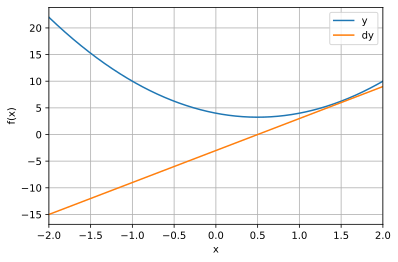

In [78]:
# Plot the function and its derivative 

# Define a range for x 
x = np.linspace(-2 ,2, 2001)

# Plottin the figure 
plt.plot(x , f(x) , x , deriv(x))
plt.xlim(x[[0 , -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y' , 'dy'])
plt.show()


Below we will see the code that implements the learning algorithm or we call it as gradient descent. 


In [79]:
# Random starting point 
localmin = np.random.choice(x , 1) # randomly choose one value from the x (points)

# Learning parameters (2 important one's)
learning_rate = .01
training_epochs = 20

# Run through the training (or) the gradient descent process 
for i in range(training_epochs):
  grad = deriv(localmin)
  print(f'Gradient: {grad}\n')
  localmin = localmin - learning_rate * grad
  print(f'Local min updated: {localmin}\n')
  print('\n----------------\n')

print(f'The absolute local min: {localmin}')


Gradient: [-13.68]

Local min updated: [-1.6432]


----------------

Gradient: [-12.8592]

Local min updated: [-1.514608]


----------------

Gradient: [-12.087648]

Local min updated: [-1.39373152]


----------------

Gradient: [-11.36238912]

Local min updated: [-1.28010763]


----------------

Gradient: [-10.68064577]

Local min updated: [-1.17330117]


----------------

Gradient: [-10.03980703]

Local min updated: [-1.0729031]


----------------

Gradient: [-9.4374186]

Local min updated: [-0.97852891]


----------------

Gradient: [-8.87117349]

Local min updated: [-0.88981718]


----------------

Gradient: [-8.33890308]

Local min updated: [-0.80642815]


----------------

Gradient: [-7.83856889]

Local min updated: [-0.72804246]


----------------

Gradient: [-7.36825476]

Local min updated: [-0.65435991]


----------------

Gradient: [-6.92615948]

Local min updated: [-0.58509832]


----------------

Gradient: [-6.51058991]

Local min updated: [-0.51999242]


----------------



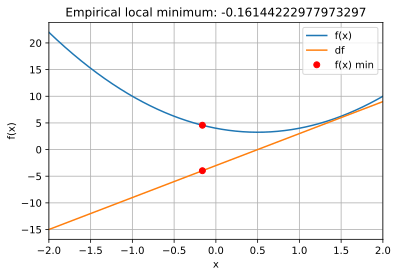

In [80]:
# Plot the above results 
plt.plot(x , f(x) , x , deriv(x))
plt.plot(localmin , deriv(localmin) , 'ro')
plt.plot(localmin , f(localmin), 'ro')

plt.xlim(x[[0 , -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)' , 'df' , 'f(x) min' ])
plt.title('Empirical local minimum: %s' %localmin[0])
plt.show()

#### Store the model parameters and output on each iteration 

In [81]:
# Random starting point from choice 
localmin = np.random.choice(x , 1)

# Learning parameters are defined 
learning_rate = .01 
training_epochs = 100 

# Now instead of running through the loop, we are going to store the mdoels parameters
# Two of the import params are localmin and the gradient, we will be storing them inside. 


modelparams = np.zeros((training_epochs, 2)) # tuple to store the model params
for i in range(training_epochs): 
  grad = deriv(localmin) # computing the gradients
  localmin = localmin - learning_rate * grad # updating the local min by mult lr and grad

  # Storing the model parammeters now 
  modelparams[i , :] = localmin , grad


print(modelparams)

[[ 0.06948    -2.748     ]
 [ 0.0953112  -2.58312   ]
 [ 0.11959253 -2.4281328 ]
 [ 0.14241698 -2.28244483]
 [ 0.16387196 -2.14549814]
 [ 0.18403964 -2.01676825]
 [ 0.20299726 -1.89576216]
 [ 0.22081743 -1.78201643]
 [ 0.23756838 -1.67509544]
 [ 0.25331428 -1.57458972]
 [ 0.26811542 -1.48011433]
 [ 0.2820285  -1.39130747]
 [ 0.29510679 -1.30782903]
 [ 0.30740038 -1.22935928]
 [ 0.31895636 -1.15559773]
 [ 0.32981897 -1.08626186]
 [ 0.34002984 -1.02108615]
 [ 0.34962805 -0.95982098]
 [ 0.35865036 -0.90223172]
 [ 0.36713134 -0.84809782]
 [ 0.37510346 -0.79721195]
 [ 0.38259725 -0.74937923]
 [ 0.38964142 -0.70441648]
 [ 0.39626293 -0.66215149]
 [ 0.40248716 -0.6224224 ]
 [ 0.40833793 -0.58507706]
 [ 0.41383765 -0.54997243]
 [ 0.41900739 -0.51697409]
 [ 0.42386695 -0.48595564]
 [ 0.42843493 -0.4567983 ]
 [ 0.43272884 -0.42939041]
 [ 0.43676511 -0.40362698]
 [ 0.4405592  -0.37940936]
 [ 0.44412565 -0.3566448 ]
 [ 0.44747811 -0.33524611]
 [ 0.45062942 -0.31513135]
 [ 0.45359166 -0.29622347]
 

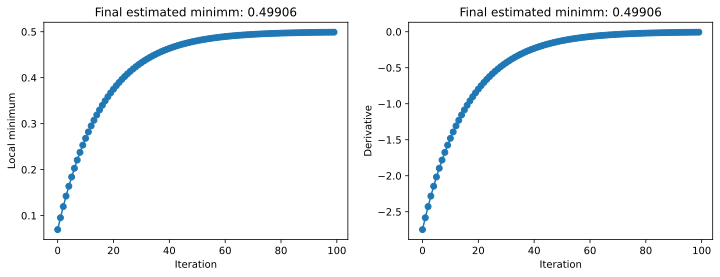

In [82]:
# Plot the gradient over iteration 

fig , ax = plt.subplots(1 ,2 , figsize = (12, 4))

for i in range(2):
  ax[i].plot(modelparams[:, i] , 'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimm: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

#### Additional Explorations. 


1. Most often in DL , the mdoel trains for a set of number of iterations, which is what we do here. But there are other ways of defining how long the training lasts. Modify the code so that the training ends when the derivative is smaller than some threshold e.g 0.1. Make sure your code is robust for negative derivatives.

2. Does this change to the code produce a more accurate result? What if you change the stopping threshold? 

3. Can you think of any potential problems that might arise when the stopping criterion is baed on the derivative instead of a specified number of training epochs. 



### Code Challenge: unfortunate starting value 

- Step 1: Repeat 1D g.d to find the minimum of the following function 
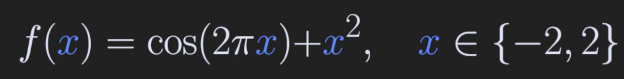

- Step 2: Hard code a starting value of x = 0

0.0
-3


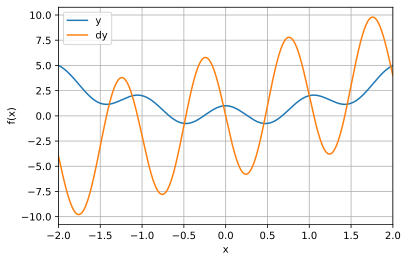

In [83]:
# The function 
import sympy as sym 

x_ = sym.symbols('x')

def f(x):
  return np.cos(2*np.pi*x) + x**2 

# Calculating the derivative via sympy 
# def deriv(x):
#   return sym.diff(f(x))

def man_deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x) + 2*x

print(man_deriv(0))
print(deriv(0))

# Plot the function and its derivative 

# Define a range for x 
x = np.linspace(-2 ,2, 2001)

# Plottin the figure 
plt.plot(x , f(x) , x , man_deriv(x))
plt.xlim(x[[0 , -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y' , 'dy'])
plt.show()


In [84]:
# Random starting point at first 
localmin = np.random.choice(x , 1)

# Defining the learning parameters 
learning_rate = .01
training_epochs = 100 

# Training algo 
modelparams = np.zeros((training_epochs , 2))
for i in range(training_epochs):
  grad = man_deriv(localmin)
  localmin = localmin - learning_rate * grad
  modelparams[i , :] = localmin , grad

localmin



array([0.47580245])

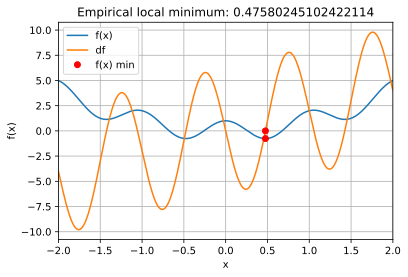

In [85]:
# Plot the above results 
plt.plot(x , f(x) , x , man_deriv(x))
plt.plot(localmin , man_deriv(localmin) , 'ro')
plt.plot(localmin , f(localmin), 'ro')

plt.xlim(x[[0 , -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)' , 'df' , 'f(x) min' ])
plt.title('Empirical local minimum: %s' %localmin[0])
plt.show()

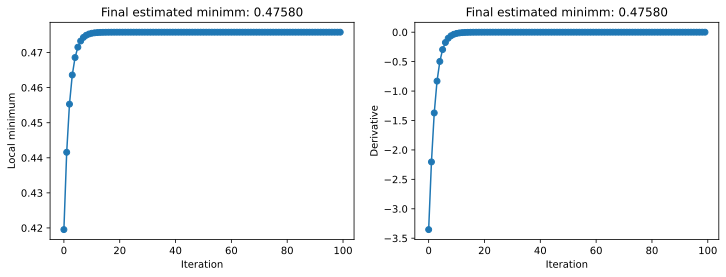

In [86]:
# Plot the gradient over iteration 

fig , ax = plt.subplots(1 ,2 , figsize = (12, 4))

for i in range(2):
  ax[i].plot(modelparams[:, i] , 'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimm: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

- **Step 2** Hard code the starting value

In [87]:
# Random starting point at first 
localmin = 0 # hard code valuee

# Defining the learning parameters 
learning_rate = .01
training_epochs = 100 

# Training algo 
modelparams = np.zeros((training_epochs , 2))
for i in range(training_epochs):
  grad = man_deriv(localmin)
  localmin = localmin - learning_rate * grad
  modelparams[i , :] = localmin , grad


localmin

0.0

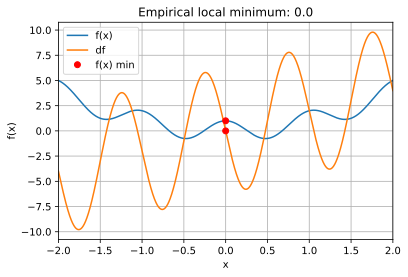

In [88]:
# Plot the above results 
plt.plot(x , f(x) , x , man_deriv(x))
plt.plot(localmin , man_deriv(localmin) , 'ro')
plt.plot(localmin , f(localmin), 'ro')

plt.xlim(x[[0 , -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)' , 'df' , 'f(x) min' ])
plt.title('Empirical local minimum: %s' %localmin)
plt.show()

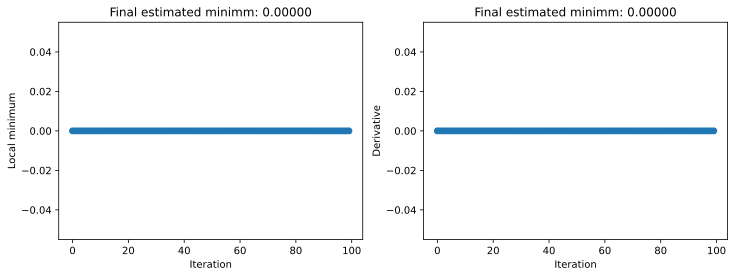

In [89]:
# Plot the gradient over iteration 

fig , ax = plt.subplots(1 ,2 , figsize = (12, 4))

for i in range(2):
  ax[i].plot(modelparams[:, i] , 'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimm: {localmin:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

The above is the example of **vanishing gradients** where the minima is close to 0 or almost 0 where the learning stops. 

In practice, these happens on rare scenario's because we will be randomly choosing out the values for our gradients. 

### Gradient Descent in 2D 


In [90]:
# The peaks function 

def peaks(x , y): 

  # expand to a 2D mesh 
  x ,y = np.meshgrid(x , y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)

  return z

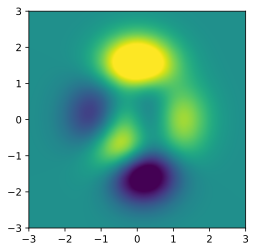

In [91]:
# Create the landscape 
x = np.linspace(-3 , 3 , 201)
y = np.linspace(-3 ,3 ,201)

Z = peaks(x ,y)

# Plotting 
plt.imshow(Z , extent = [x[0] , x[-1] , y[0] , y[-1]] , vmin = -5 , vmax= 5 , origin ='lower')
plt.show()

To design a diff calculus https://scipy-lectures.org/packages/sympy.html#differential-equations

In [92]:
# Create derivative functions using sympy 

sx , sy = sym.symbols('sx , sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
    - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
    - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# Create functions from the sympy-computer derivatives 
df_x = sym.lambdify((sx , sy) , sym.diff(sZ , sx) , 'sympy')
df_y = sym.lambdify((sx , sy) , sym.diff(sZ , sy) , 'sympy')


df_x(1,1).evalf()

-1.07369833656079

In [93]:
# Random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates 
startpoint = localmin[:] # make a copy, not re-assign

# Learning parameters 
learning_rate= .01 
training_epochs = 1000

# Run through training 
trajectory = np.zeros((training_epochs , 2))
for i in range(training_epochs):

  # Two parital derivatives are organized saved in a var gradient 
  grad = np.array([df_x(localmin[0] , localmin[1]).evalf() , 
                   df_y(localmin[0] , localmin[1]).evalf()])
  
  localmin = localmin - learning_rate * grad
  trajectory[i, :] = localmin

print(localmin)
print(startpoint)

[0.296445553846832 0.320196247666835]
[0.89967631 0.44983806]


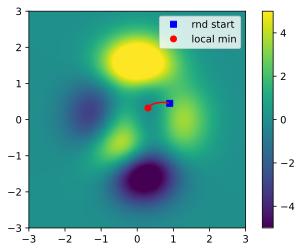

In [94]:
# Looking at the plot 
plt.imshow(Z , extent = [x[0] , x[-1] , y[0] , y[-1]] , vmin = -5 , vmax= 5 , origin ='lower')
plt.plot(startpoint[0] , startpoint[1] , 'bs')
plt.plot(localmin[0] , localmin[1] , 'ro')
plt.plot(trajectory[:, 0] , trajectory[:,1], 'r')
plt.legend(['rnd start' , 'local min'])
plt.colorbar()
plt.show()

#### Additional exploration 

1. Modify the code to force the initial guess to be [0,1,4]. Does the model reach a reasonable local minimum? 

2. Using the same starting point, change the number of training epochs to 10,000. Does the final solution differ from using 1000 epochs? 

3. (Again with the same starting location) Change the learning rate to .1 (1000 epochs). What do you notice about the trajectory? Try again with the learning rate set to .5 and then to .0001. 

### Parametric experiments in gradient descent 

In [95]:
# Defining thhe function 
x = np.linspace(-2*np.pi , 2*np.pi , 401)

# sin wave multiplied by a guassian
fx = np.sin(x) * np.exp(-x**2*.05) # this func has very clear global and local minimum

print(fx[:5])

[3.40234149e-17 4.45006837e-03 9.07174143e-03 1.38640478e-02
 1.88256904e-02]


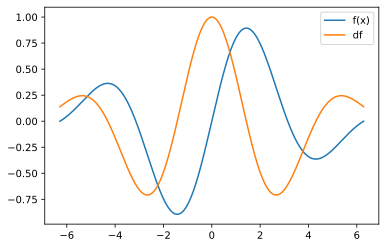

In [96]:
# The derivative 
df = np.cos(x)* np.exp(-x**2*.05) + np.sin(x) * (-.1*x)*np.exp(-x**2*.05)

# Plotting the function and its derivative 
plt.plot(x , fx , x , df)
plt.legend(['f(x)' , 'df'])

In [97]:
# Writing the above variable in functions 
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
  return np.cos(x) * np.exp(-x**2*.05) + np.sin(x) *.1*x*np.exp(-x**2*.05)

deriv(x)[:10]

array([0.13891113, 0.13882139, 0.13854826, 0.13808593, 0.13742872,
       0.13657104, 0.13550743, 0.13423257, 0.13274127, 0.13102854])

Now we will get into the trainin algorithm where will be starting with a random point at first. 

**Vanilla gradient descent** : A basic gradient descent algorithm without any major parametric changes. The ultimate newbie indeed. 

https://stats.stackexchange.com/questions/295180/what-does-vanilla-mean#:~:text=Vanilla%20gradient%20descent%20means%20the,the%20gradient%20of%20each%20datapoint.

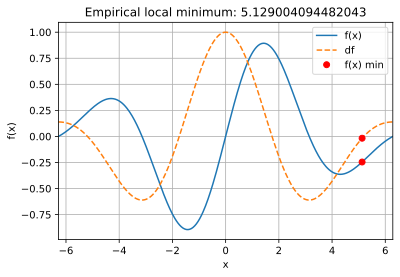

In [98]:
# Random starting point 
localmin = np.random.choice(x , 1) # return one number from x 

# Defining the learning parameters 
learning_rate = .01 
training_epochs = 1000 

# Training through the epochs
for i in range(training_epochs):

  # Computing the gradients 
  grad = deriv(localmin)

  # Updating the localmin parameter by scaling with a learning rate 
  localmin -= learning_rate*grad

# Plotting the results 
plt.plot(x , fx(x) , x , deriv(x) , '--')
plt.plot(localmin , deriv(localmin) , 'ro')
plt.plot(localmin , fx(localmin) , 'ro')

plt.xlim(x[[0 , -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)' , 'df' , 'f(x) min'])
plt.title('Empirical local minimum: %s' %localmin[0])
plt.show()


#### Run parametric experiments 


**Experiment 1: Systematically varying the starting locations** 


Before we used the random choice to pick a starting location outta nowhere, but now we will be systematically scale the starting location within a range of avlues `(-5 ,5)`

Here we will use 50 different starting locations and store those result in `finalres`

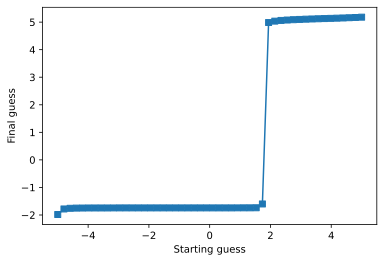

In [99]:
# Defining the start locations 
startlocs = np.linspace(-5 , 5 , 50) # system shit 
finalres = np.zeros(len(startlocs))

# Loop over the starting points 
for idx , localmin in enumerate(startlocs):

  # Run through training epochs
  for i in range(training_epochs):
    # Compute gradients 
    grad = deriv(localmin)
    # Scale the local min 
    localmin -= learning_rate*grad 

  # Store the result in final res by indexing into them 
  # Final guess / estimate
  finalres[idx] = localmin

# Plot the results 
plt.plot(startlocs , finalres , 's-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

In [100]:
finalres

array([-1.98347554, -1.78086416, -1.75704233, -1.75033089, -1.74757942,
       -1.74618637, -1.74537787, -1.74486108, -1.74450588, -1.74424737,
       -1.74405018, -1.74389368, -1.7437651 , -1.74365616, -1.74356123,
       -1.74347633, -1.74339849, -1.74332542, -1.7432552 , -1.74318616,
       -1.74311666, -1.74304499, -1.74296922, -1.74288692, -1.74279486,
       -1.74268843, -1.74256062, -1.74239992, -1.74218589, -1.74187798,
       -1.74138236, -1.74042099, -1.73764408, -1.60024241,  4.98463085,
        5.03555754,  5.06004187,  5.07595831,  5.08787743,  5.09761083,
        5.106059  ,  5.11374385,  5.12100852,  5.12810701,  5.13525116,
        5.14263959,  5.15047957,  5.15900769,  5.16851357,  5.17937134])

**Experiment 2: Systematically varying the learning rate**

Instead of the starting point we will tweaking the learning rate parameter and see how it affects our models performance. 

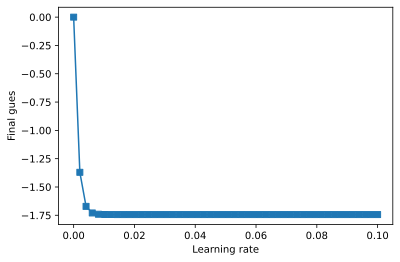

In [101]:
# Tweak the learning rate!!! 

learning_rates = np.linspace(1e-10 , 1e-1 , 50)
finalres = np.zeros(len(learning_rates))

# Loop over the learning rates 
for idx , lr_ in enumerate(learning_rates):

  # Force starting guess to 0
  localmin = 0

  # Run through the experiments
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin -= lr_*grad 

  # Store the final guess 
  finalres[idx] = localmin

# Plotting the results 
plt.plot(learning_rates , finalres , 's-')
plt.xlabel('Learning rate')
plt.ylabel('Final gues')
plt.show()

**Experiment 3: Interaction between learning rate and training epochs** 

Here we will manipulate both the learning rates and the training epochs.

In [102]:
# Setup the parameters 
learning_rates = np.linspace(1e-10 , 1e-1 , 50)
training_epochs = np.round(np.linspace(10 , 500 , 40))

# Using a matrix to store the results becoz of two params 
finalres = np.zeros((len(learning_rates) , len(training_epochs)))


# Loop over the learning rates 
for lr_idx , learning_rate in enumerate(learning_rates):

  # Loop over the training epochs 
  for epo_idx , epoch in enumerate(training_epochs):

    # Running through the gd experiment 
    # Starting location is 0 again 
    localmin = 0

    for i in range(int(epoch)):
      grad = deriv(localmin)
      localmin -=  learning_rate*grad

    # Store the final guess 
    finalres[lr_idx , epo_idx] = localmin


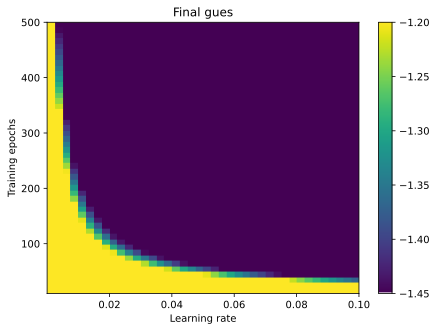

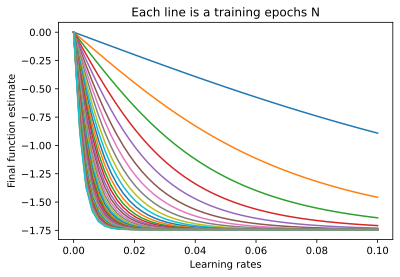

In [103]:
# Plot the results 
fig , ax = plt.subplots(figsize = (7 ,5))

plt.imshow(finalres , extent= [learning_rates[0] , learning_rates[-1] , training_epochs[0], 
           training_epochs[-1]] , aspect = 'auto' , origin = 'bottom' , 
           vmin = -1.45 , vmax = -1.2)

plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final gues')
plt.colorbar()
plt.show()

# Second visualization (Learning rate vs Final result)
plt.plot(learning_rates , finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

### Code Challenge: Fixed vs Dynamic Learning rate

- Learn the model learning rate doesn't need to have a static value. 
- Think about different ways to change the learning rate, and when certain methods can fail. 


To do, 
Think about how to change the learning rate, 
1. Time (training epoch) 
2. Derivative 
3. Loss 
4. Current local minimum value 

Think critically how the code might fail. 

In [133]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

In [134]:
# By Epochs 

# define a range for x
x = np.linspace(-2,2,2001)


localmin = np.random.choice(x , 1)

# Learning parameters 
learning_rate = .01
training_epochs = 50 


# Run through training and sotyr all the results 
modelparamsEpochs = np.zeros((training_epochs,3))

for i in range(1,training_epochs):
  grad = deriv(localmin)
  localmin -= learning_rate*grad 
  learning_rate =   (learning_rate * i) / 100
  modelparamsEpochs[i , :] = localmin , grad, learning_rate


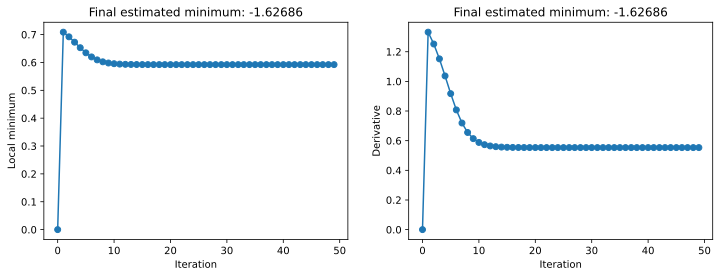

In [135]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

**Gradient based learning rate**

We change the learning rate w.r.t gradient value

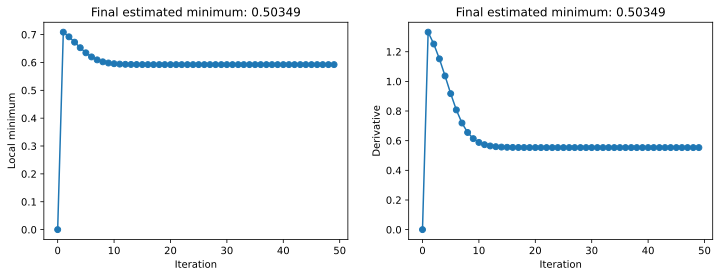

In [136]:
# define a range for x
x = np.linspace(-2,2,2001)


localmin = np.random.choice(x , 1)

# Learning parameters 
learning_rate = .01
training_epochs = 50 


# Run through training and sotyr all the results 
modelparamsGrad = np.zeros((training_epochs,3))

for i in range(1,training_epochs):
  grad = deriv(localmin)
  localmin -= learning_rate*grad 
  learning_rate *= np.abs(grad)
  modelparamsGrad[i , :] = localmin , grad , learning_rate

# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

**Gradient descent using a time-based learning rate** 

In [137]:
# Redefine parameters 

learning_rate = 0.1
localmin = np.random.choice(x ,1)

localmin = localmin[:]

# Run through the training and store all the results 
modelparamsTime = np.zeros((training_epochs , 3))

for i in range(training_epochs):
  grad = deriv(localmin)

  # Updating the learning rate 
  lr = learning_rate*(1 - (i + 1)/ training_epochs ) # here we divide the current epoch by the total epochs
  
  # Updating the local min 
  localmin -= lr*grad
  modelparamsTime[i, :] = localmin , grad , lr

print(modelparamsTime[:2])

[[ 0.382992   -1.704       0.098     ]
 [ 0.45038861 -0.702048    0.096     ]]


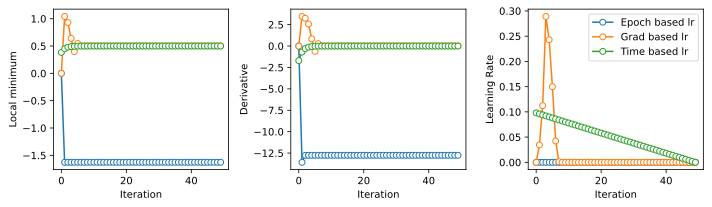

In [138]:
# Plotting the results 

fig , ax = plt.subplots(1 , 3 , figsize = (10 , 3))

# generate the plots for 3 cases we've worked so far 
for i in range(3):
  ax[i].plot(modelparamsEpochs[: , i] , 'o-' , markerfacecolor = 'w')
  ax[i].plot(modelparamsGrad[: , i] , 'o-' , markerfacecolor = 'w')
  ax[i].plot(modelparamsTime[: , i] , 'o-' , markerfacecolor = 'w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Epoch based lr' , 'Grad based lr' , 'Time based lr'])

plt.tight_layout()
plt.show()